In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Analyse en Composante Principale

In [2]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)  # Convertir en DataFrame
y = data.target  # Cibles

In [3]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
X.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [6]:
X.shape

(150, 4)

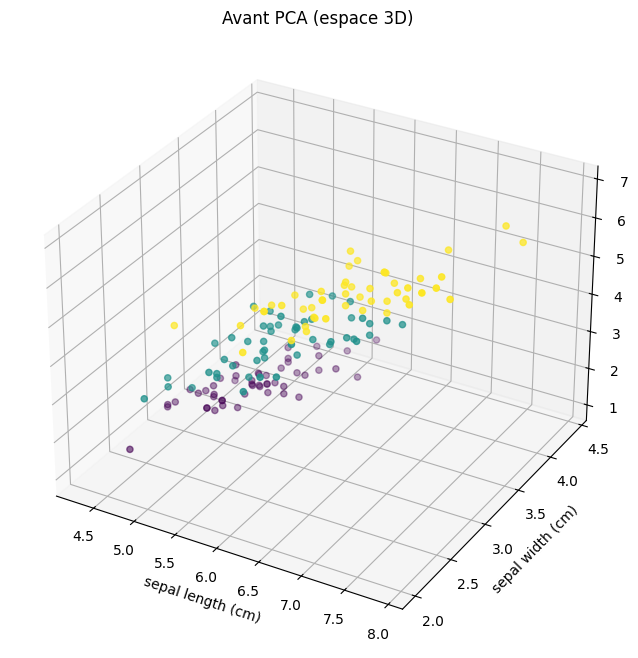

In [7]:
# visualization before PCA
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection='3d')

# Tracer les données dans l'espace 3D
scatter = ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=y, cmap='viridis')
ax.set_xlabel(X.columns[0])
ax.set_ylabel(X.columns[1])
ax.set_zlabel(X.columns[2])
plt.title("Avant PCA (espace 3D)")
plt.savefig('iris_3d.png', dpi=300, bbox_inches='tight')  # dpi pour la résolution
# Show the plot
plt.show()

In [8]:
# calculer la moyenne de chaque variable (X1, X2, ..., Xp)
X_mean = np.mean(X, axis= 0)
X_mean

,0
sepal length (cm),5.843333
sepal width (cm),3.057333
petal length (cm),3.758000
petal width (cm),1.199333


In [9]:
# la variance de chaque variable
X_var = np.std(X, axis = 0)
X_var

,0
sepal length (cm),0.825301
sepal width (cm),0.434411
petal length (cm),1.759404
petal width (cm),0.759693


In [10]:
# centrer et reduire la matrice
X = (X - X_mean) / X_var
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [11]:
# la moyenne des variables apres le centrage et la reduction
print(np.mean(X, axis= 0))

sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64


In [12]:
# la variance des variables apres le centrage et la reduction
print(np.std(X, axis= 0))

sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


In [13]:
# matrice de correlation
matrice_corr = X.corr()
matrice_corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [14]:
# vecteurs propres et valeurs propres
valeurs_propres, vecteurs_propres = np.linalg.eig(matrice_corr)

In [15]:
# Trier les indices des valeurs propres (ici, on les trie par ordre décroissant)
indices_triees = np.argsort(valeurs_propres)[::-1]

# Trier les valeurs propres
valeurs_propres = valeurs_propres[indices_triees]

# Trier les vecteurs propres selon les indices triés
vecteurs_propres = vecteurs_propres[:, indices_triees]

In [16]:
valeurs_propres

array([2.91849782, 0.91403047, 0.14675688, 0.02071484])

In [17]:
vecteurs_propres

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [18]:
for i in range(X.shape[1]) :
    print(f"norm de vecteur propre {i+1} : {np.linalg.norm(vecteurs_propres[i])}")

norm de vecteur propre 1 : 1.0
norm de vecteur propre 2 : 1.0
norm de vecteur propre 3 : 1.0
norm de vecteur propre 4 : 0.9999999999999994


In [19]:
# verifier que la sommme des valeurs propres == inertie totale
somme_valeurs_propres = np.sum(valeurs_propres)
somme_valeurs_propres

4.0

In [20]:
# trace de la matrice de correlation
inertie_totale = np.trace(matrice_corr)
inertie_totale

4.0

In [21]:
# la somme des varainces des variables apres le centrage et reduction
somme_variances = np.sum(np.std(X))
somme_variances

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


3.999999999999999

In [22]:
# pourcentage de l'inertie expliquèe par chaque axe principale
inertie_explique_totale = []
for i in range(X.shape[1]) :
    pourcentage_inertie = (valeurs_propres[i] / inertie_totale) * 100
    inertie_explique_totale.append(pourcentage_inertie)
    print(f"Pourcentage d'inertie expliquée par la composante principale {i+1} : {pourcentage_inertie:.2f} %")

Pourcentage d'inertie expliquée par la composante principale 1 : 72.96 %
Pourcentage d'inertie expliquée par la composante principale 2 : 22.85 %
Pourcentage d'inertie expliquée par la composante principale 3 : 3.67 %
Pourcentage d'inertie expliquée par la composante principale 4 : 0.52 %


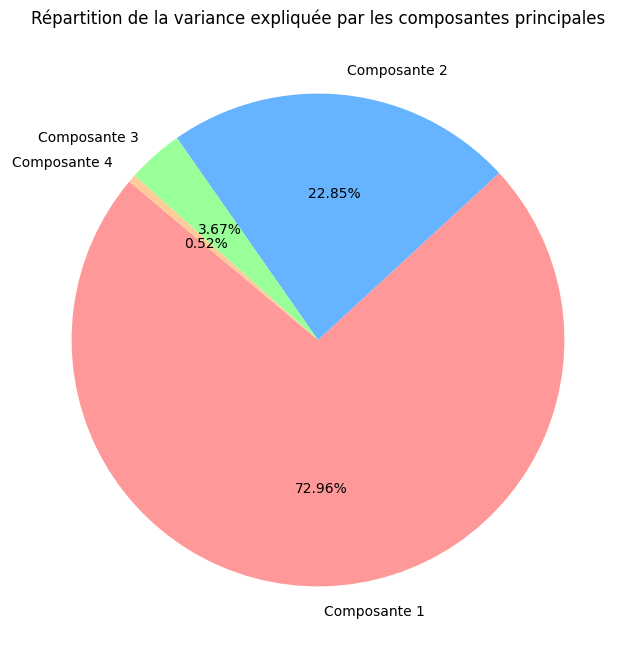

In [23]:
# Labels pour les composantes principales
labels = [
    "Composante 1",
    "Composante 2",
    "Composante 3",
    "Composante 4"
]

# Définir une liste de couleurs (ici, des couleurs hexadécimales ou prédéfinies)
couleurs = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FF9966', '#FF66B3', '#C2C2F0', '#FFB3E6']

# Créer le pie chart
plt.figure(figsize=(8, 8))
plt.pie(inertie_explique_totale, labels=labels, autopct='%1.2f%%', startangle=140, colors=couleurs)
plt.title("Répartition de la variance expliquée par les composantes principales")
plt.show()

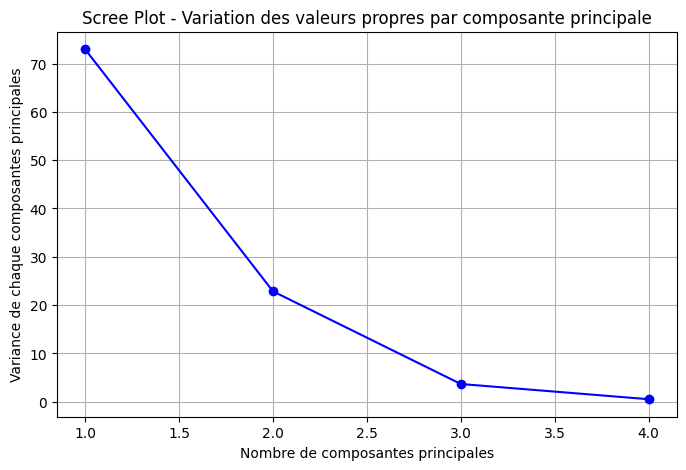

In [24]:
# Création du scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, X.shape[1] + 1), inertie_explique_totale, marker='o', linestyle='-', color='b')

# Ajouter des titres et des étiquettes
plt.title("Scree Plot - Variation des valeurs propres par composante principale")
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Variance de chaque composantes principales")

# Afficher le graphique
plt.grid(True)
plt.show()

In [25]:
F = []
for i in range(X.shape[1]) :
    F.append(np.dot(X, vecteurs_propres[i]))
# transformer F en dataframe
F = pd.DataFrame(np.transpose(F), columns=labels)
F

,Composante 1,Composante 2,Composante 3,Composante 4
0,-0.233230,-0.863303,0.316056,-2.115802
1,0.074899,0.264668,0.203591,-2.175638
2,-0.184237,-0.109029,0.043582,-2.379393
3,-0.242289,0.163927,-0.004951,-2.360324
4,-0.383247,-1.043206,0.240091,-2.199654
...,...,...,...,...
145,0.379487,-0.136378,-0.438975,1.873610
146,0.505564,1.094116,-0.286265,1.329099
147,0.150033,-0.022332,-0.263140,1.529958
148,-0.365513,-0.795576,-0.797007,1.541859


In [26]:
n = X.shape[0]  # Nombre d'individus
contributions = pd.DataFrame()

# Calcul des contributions pour chaque axe
for k in range(len(valeurs_propres)):
    F_k = F.iloc[:, k]  # Coordonnées des individus sur l'axe k
    contribution_k = (F_k**2) / (n * valeurs_propres[k])  # Contribution
    contributions[f'Contrib_Axe_{k+1}'] = contribution_k

# Afficher les contributions
print("Contributions des individus à la création des axes :")
print(contributions)

Contributions des individus à la création des axes :
     Contrib_Axe_1  Contrib_Axe_2  Contrib_Axe_3  Contrib_Axe_4
0         0.000124       0.005436       0.004538       1.440712
1         0.000013       0.000511       0.001883       1.523352
2         0.000078       0.000087       0.000086       1.822047
3         0.000134       0.000196       0.000001       1.792960
4         0.000336       0.007938       0.002619       1.557170
..             ...            ...            ...            ...
145       0.000329       0.000136       0.008754       1.129759
146       0.000584       0.008731       0.003723       0.568515
147       0.000051       0.000004       0.003145       0.753332
148       0.000305       0.004616       0.028856       0.765097
149       0.000150       0.000269       0.010562       0.287651

[150 rows x 4 columns]


In [27]:
qualite_representation = pd.DataFrame()

# Calcul de la norme des individus (distance au carré)
normes = (F**2).sum(axis=1)

# Qualité de représentation pour chaque axe
for k in range(len(valeurs_propres)):
    F_k = F.iloc[:, k]  # Coordonnées des individus sur l'axe k
    qualite_k = (F_k**2) / normes  # Qualité de représentation
    qualite_representation[f'QLT_Axe_{k+1}'] = qualite_k

# Afficher la qualité de représentation
print("Qualité de représentation des individus sur les axes :")
print(qualite_representation)

Qualité de représentation des individus sur les axes :
     QLT_Axe_1  QLT_Axe_2  QLT_Axe_3  QLT_Axe_4
0     0.010118   0.138628   0.018580   0.832674
1     0.001157   0.014442   0.008545   0.975857
2     0.005945   0.002082   0.000333   0.991640
3     0.010378   0.004750   0.000004   0.984867
4     0.023956   0.177496   0.009402   0.789147
..         ...        ...        ...        ...
145   0.037253   0.004811   0.049848   0.908088
146   0.077426   0.362630   0.024824   0.535120
147   0.009252   0.000205   0.028460   0.962084
148   0.035352   0.167485   0.168088   0.629074
149   0.053602   0.030028   0.189169   0.727201

[150 rows x 4 columns]


In [28]:
# pour verifier la qualitè de representation de premier individu sur tout les axes est correcte
print(qualite_representation.iloc[0])
print(f"la somme est : {qualite_representation.iloc[0].sum()}")

QLT_Axe_1    0.010118
QLT_Axe_2    0.138628
QLT_Axe_3    0.018580
QLT_Axe_4    0.832674
Name: 0, dtype: float64
la somme est : 1.0


### Implementation de Scikit Learn

Pour verifier si notre implementation est identique avec le model pre-difinie d'ACP dans la librèrie de Sickit-learn

In [29]:
pca = PCA()
x_pca = pca.fit_transform(X)

In [30]:
for i in range(X.shape[1]) :
    print(f"valeur propre de {i+1} axe factoriel : {pca.explained_variance_[i]}")

valeur propre de 1 axe factoriel : 2.9380850501999958
valeur propre de 2 axe factoriel : 0.9201649041624861
valeur propre de 3 axe factoriel : 0.14774182104494818
valeur propre de 4 axe factoriel : 0.02085386217646197


In [31]:
for i in range(X.shape[1]) :
    print(f"pourcentage d'inertie expliquée par la composante principale {i+1} : {pca.explained_variance_ratio_[i] * 100:.2f} %")

pourcentage d'inertie expliquée par la composante principale 1 : 72.96 %
pourcentage d'inertie expliquée par la composante principale 2 : 22.85 %
pourcentage d'inertie expliquée par la composante principale 3 : 3.67 %
pourcentage d'inertie expliquée par la composante principale 4 : 0.52 %


notre methode est exactement comme le modèle prèdifinie !

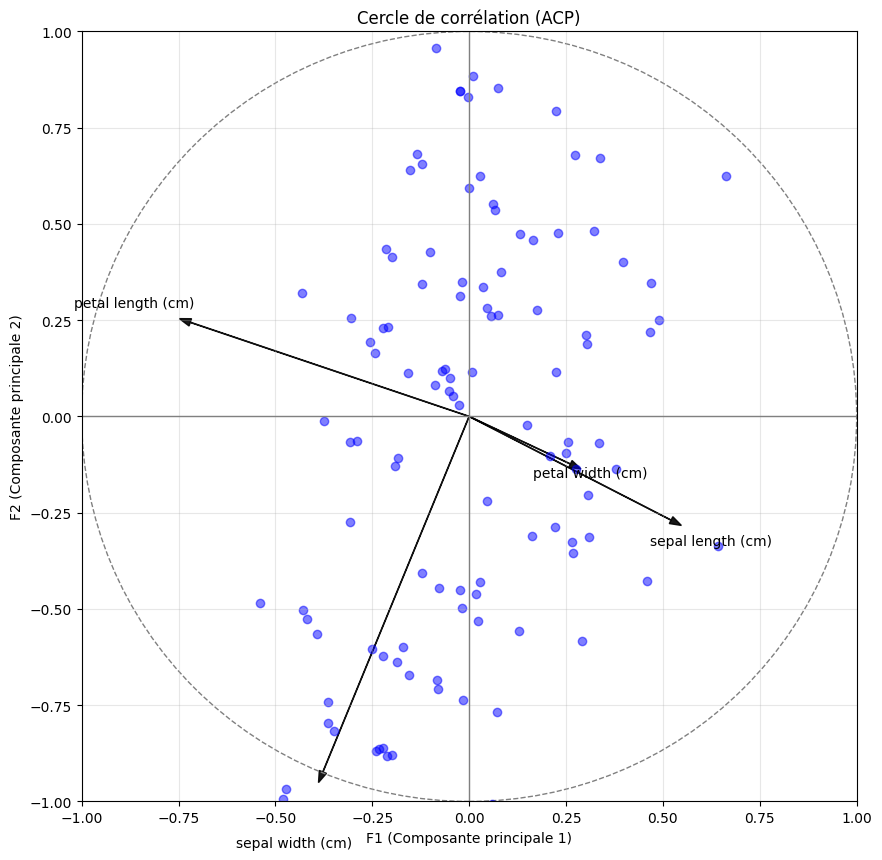

In [32]:
# Créer le cercle de corrélation avec toutes les variables
# Extraction des coefficients des variables pour les deux premières composantes principales
coef = np.transpose(vecteurs_propres)[:, :2]  # On utilise toutes les variables mais seulement F1 et F2

scores = F[:][['Composante 1', 'Composante 2']]

# Créer la figure
plt.figure(figsize=(10, 10))

# Placer les vecteurs des variables
for i in range(coef.shape[0]):  # Parcours de toutes les variables
    plt.arrow(0, 0, coef[i, 0], coef[i, 1], color='k', alpha=0.9, head_width=0.02)
    plt.text(coef[i, 0] * 1.2, coef[i, 1] * 1.2, X.columns[i], color='k', ha='center', va='center')

# Placer le cercle unitaire
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Ajouter le nuage des individus (points dans l'espace des 2 premières composantes)
plt.scatter(F[:]['Composante 1'], F[:]['Composante 2'], color='blue', alpha=0.5)

# Ajuster les limites et ajouter des lignes
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)

# Ajouter des labels
plt.xlabel('F1 (Composante principale 1)')
plt.ylabel('F2 (Composante principale 2)')
plt.title('Cercle de corrélation (ACP)')

# Afficher la figure
plt.grid(alpha=0.3)
plt.savefig('cercle de corrèlation.png', dpi=300, bbox_inches='tight')  # dpi pour la résolution
plt.show()

## Interprétation du cercle de corrélation ACP

### 1. Cercle unitaire
- Les variables représentées dans ce cercle sont projetées dans le plan formé par les deux premières composantes principales (F1 et F2).
- Plus les vecteurs des variables sont proches du cercle, plus celles-ci sont bien représentées dans ce plan (elles contribuent significativement aux deux premières composantes principales).

### 2. Représentation des variables
- Les flèches indiquent la corrélation des variables avec les composantes principales. La direction et la longueur des flèches permettent d’interpréter l’importance et la contribution des variables.
  - **Exemple** :
    - La variable `sepal length (cm)` est fortement corrélée avec la composante F1.
    - La variable `petal length (cm)` est principalement corrélée avec la composante F2.
    - La variable `sepal width (cm)` est légèrement corrélée négativement avec F1 et F2.

### 3. Nuage des individus
- Les points bleus représentent les individus projetés dans ce plan factoriel.
- La position d'un individu dans le graphique dépend des valeurs des composantes principales F1 et F2 pour cet individu. Cela reflète sa similarité avec les variables représentées par les axes.

### 4. Relations entre les variables
- Si deux flèches sont proches l’une de l’autre, cela indique une **forte corrélation positive** entre ces variables.
- Si deux flèches sont **perpendiculaires**, cela suggère qu’il n’y a **pas de corrélation** entre elles.
- Si deux flèches sont **opposées**, cela montre une **corrélation négative**.

---

### Conclusion générale
- Ce graphique permet d'analyser les relations entre les variables et leur contribution aux composantes principales.
- Les variables qui se trouvent proches du cercle unitaire sont les plus importantes dans cette projection, tandis que celles qui se situent vers le centre contribuent moins.

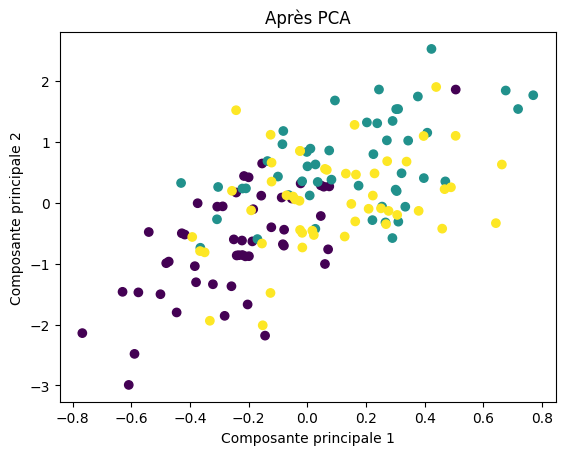

In [33]:
# visualisation after PCA
plt.figure()
plt.scatter(F.iloc[:, 0], F.iloc[:, 1], c=y, cmap='viridis')
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.title("Après PCA")
plt.savefig('iris_pca_projection.png', dpi=300, bbox_inches='tight')  # dpi pour la résolution
plt.show()